# Week 5 Application Exercise

This is the starting notebook for the Week 5 application exercise.  It is intended to demonstrate several things:

- The use of simulation as a tool for understanding statistical methods
- Performing hypothesis tests
- The difference between paired and two-sample tests

Save the notebook file and `.py` file into the same folder to start work on the assignment.

Please treat the experiment as a black box and infer its behavior using the statistical techniques we have learned in class.  After class, I invite you to look at its source code and see how it works.

The core idea of this is to identify whether “fabulators” under condition A have higher (or lower) nonsense production than under condition B.  The code will describe an experimental design, and allow you to “run” the experiment to draw samples.

## Software Requirements

This exercise requires an additional Python package that is not included in a default Anaconda install - the [seedbank](https://seedbank.lenskit.org) library.  You can install this with Pip:

    pip install seedbank

It's also available in Conda-Forge:

    conda install -c conda-forge seedbank
    
Because it only has a few dependencies, and they are all included in almost all base Conda environments, the Pip installation works fine, and doesn't mix packages between Conda repositories.

## Setup

This project requires an additional 

We need to do our usual imports:

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

Because we are using random number generation, we want to **seed** the random number generator.  If we initialize it with the a fixed seed, re-running the notebook repeatedly will produce the same results.  This is useful for debugging and reproducibility.  We'll often want to re-run with a *different* seed before submitting, just to make sure that our results aren't accidentally the result of a pathological choice of random seeds.

The Seedbank library initializes and seeds a wide range of Python random number generators.  The basic usage is to directly seed with a call to `initialize` (for teaching notebooks, I often use the current date as my random seed):

    import seedbank
    seedbank.initialize(20210923)

However, if we all ran that code, we would all get the same results, but for this exercise I would like different teams to get *different* results.  Therefore, we will take advantage of another Seedbank feature that allows us to specify additional string keys that get incorporated into the random seed.  In the following cell, edit it to use your team name:

In [2]:
TEAM_NAME = 'DemoTeam'
import seedbank
seedbank.initialize(20210923, TEAM_NAME)

SeedSequence(
    entropy=20210923,
    spawn_key=(array([1652547376, 2490093471, 1609550347, 3146785967], dtype=uint32),),
)

The last piece is to import our custom module to get a 'world' from which we can sample:

In [3]:
from cs533_w5_world import Experiment

And then create our experiment:

In [4]:
exp = Experiment()

## Getting Data

We first need to know where our data is coming from.  The experiment describes itself:

In [5]:
print(exp.describe())

This experiment measures the nonsense output of fabulators under different
conditions.  It measures each fabulator twice, under two different conditions,
to see how much nonsense they produce in each condition.

Your goal is to measure whether condition A causes fabulators to produce more
(or less) nonsense than condition B.


We can run an instance of this experiment with size 50:

In [6]:
SAMPLE_SIZE = 50
data = exp.run_experiment(SAMPLE_SIZE)
data

,subject,CondA_Nonsense,CondB_Nonsense
0,1,491.270180,499.758309
1,2,488.037759,542.379451
2,3,487.521976,522.155873
3,4,493.054680,489.373105
4,5,494.986270,533.758312
5,6,478.886057,511.341658
6,7,497.455639,504.963985
7,8,486.829052,431.089760
8,9,498.118970,506.350791
9,10,496.422109,502.459254


## Comparing Conditions/Groups

Review the experiment description.  You need to compare A and B with a *t*-test, but the precise details will depend on your experiment structure.

✅ Do you need to use a **paired** t-test or an **independent two-sample** t-test for this analysis?

This analysis is **paired**, because each is studied twice.  Note that if you re-run with a different version of NumPy or on a different platform, you may get a different experimental description.  The description I received is:

> This experiment measures the nonsense output of fabulators under different
conditions.  It measures each fabulator twice, under two different conditions,
to see how much nonsense they produce in each condition.
> 
> Your goal is to measure whether condition A causes fabulators to produce more
(or less) nonsense than condition B.


✅ What is the **null hypothesis** for the test with this data?

The null hypothesis is that average difference between conditions, taken over subjects is 0:

$$H_0: \mu_{A-B} = 0$$

✅ Compute the means of both groups or conditions:

In [7]:
meanA = data['CondA_Nonsense'].mean()
meanA

489.95387441009194

In [8]:
meanB = data['CondB_Nonsense'].mean()
meanB

500.39221510571775

✅ Compute the *difference* in means. How much more nonsense is produced in A vs. B?

This is also called the *effect size* (or specifically, the *unstandardized effect size*).

In [11]:
diff = meanA - meanB
diff

-10.438340695625811

I mentioned in class to several of you that this is the *same* as the mean of the differences.  Let's see that:

In [10]:
np.mean(data['CondA_Nonsense'] - data['CondB_Nonsense'])

-10.438340695625891

This is because:

$$\begin{align*}
\bar{x_A - x_B} & = \frac{\sum (x_{Ai} - x_{Bi})}{n} \\
& = \frac{\sum x_{Ai}}{n} - \frac{\sum x_{Bi}}{n} \\
& = \bar{x_A} - \bar{x_B}
\end{align*}$$

✅ Run the appropriate *t*-test to test if this difference is statistically significant and obtain a *p*-value:

I will use `stats.ttest_rel` for a paired T-test:

In [13]:
stats.ttest_rel(data['CondA_Nonsense'], data['CondB_Nonsense'])

Ttest_relResult(statistic=-3.028225882473857, pvalue=0.003916899922623179)

✅ What does this result mean?

This means that there is a statistically significant difference in the amount of nonsense produced under the two conditions.

## Bootstrap

✅ Bootstrap a confidence interval for the effect size (note that the bootstrap procedure will differ between paired and unpaired analyses):

Since this is *paired*, we're going to bootstrap the mean differences.  First get an RNG:

In [14]:
rng = seedbank.numpy_rng()

Compute the differences:

In [15]:
diffs = data['CondA_Nonsense'] - data['CondB_Nonsense']
np.mean(diffs)

-10.438340695625891

And bootstrap:

In [16]:
NBOOT = 10000
boot_means = np.array([np.mean(rng.choice(diffs, SAMPLE_SIZE, replace=True)) for i in range(NBOOT)])
pd.Series(boot_means).describe()

count    10000.000000
mean       -10.484656
std          3.393182
min        -22.488613
25%        -12.774479
50%        -10.514809
75%         -8.247773
max          2.501482
dtype: float64

Our confidence interval is the 0.025 and 0.975 quantiles:

In [17]:
np.quantile(boot_means, [0.025, 0.975])

array([-17.121503  ,  -3.75708957])

It excludes 0, which is consistent with our t-test.

## Sampling Distribution

✅ Compute the effect size of **100 runs** of your experiment.  Describe the distribution of these effect sizes numerically and graphically.

In [18]:
def run_eff(exp):
    data = exp.run_experiment(SAMPLE_SIZE)
    diff = data['CondA_Nonsense'].mean() - data['CondB_Nonsense'].mean()
    return diff

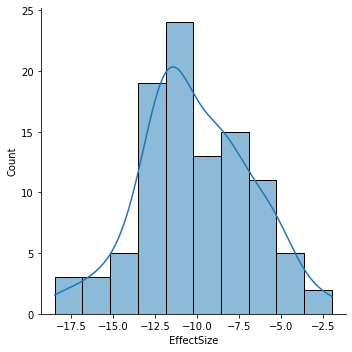

In [26]:
rep_eff_sizes = pd.Series([run_eff(exp) for i in range(100)])
rep_eff_sizes.name = 'EffectSize'
sns.displot(x=rep_eff_sizes, kde=True)

In [23]:
rep_eff_sizes.describe()

count    100.000000
mean     -10.025099
std        3.877443
min      -21.229353
25%      -12.713764
50%       -9.810588
75%       -7.110973
max       -1.131715
Name: EffectSize, dtype: float64

This looks perhaps slightly left-skewed, although it's close to symmetric, and theoretically should be symmetric (it should actually be normal, centered around the true mean).

⚠ While the confidence interval above will likely be close percentiles of the effect size distribution, they are not the same thing.  **Why is that?**

Because the *width* of the confidence interval is an estimate of the spread of the sampling distribution, but the confidence interval is not the quantiles of the sampling distribution.  The confidence interval is the result of the confidence interval procedure, and is an interval such that 95% of intervals computed with that procedure will contian the true mean, but it does directly compute properties of the sampling distribution.

## The Answers

The experiment can tell you the answers (do **not** run this until you have completed the rest):

In [27]:
exp.answers()

'This was an paired experiment with effect size -10.0261'

We can see that our estimate of the effect size is pretty close to the true effect size, and also that the mean of the sampling distribution above is very close to the true effect size.

## Other Analysis

If you have time, create a second experiment with the opposite configuration of your initial.  The experiment class takes a `paired` option that you can use to force a paired or unpaired design by passing `True` or `False`:

    exp2 = Experiment(paired=True)

If you needed a paired analysis above, create an unpaired experiment (`paired=False`); if you used an independent analysis above, create a paired analysis. Repeat as much of your analysis as you can with the new experimental design.

**Note:** for the sake of time, I am not going to repeat everything.  I will capture the key differences.

In [28]:
exp2 = Experiment(paired=False)
print(exp2.describe())

This experiment measures the nonsense output of fabulators under different
conditions.

This experiment randomly assigns each subject (fabulator) one of two different
treatments, and measures the amount of nonsense they produce in a 10-minute period
under otherwise-identical conditions.

Your goal is to measure assess whether condition A results in more (or less) nonsense
than condition B.


Run it:

In [29]:
data2 = exp2.run_experiment(SAMPLE_SIZE)
data2.head()

,subject,Condition,Nonsense
0,1,A,504.291637
1,2,A,508.474578
2,3,A,505.243652
3,4,A,504.728108
4,5,A,510.258252


Extract each group's nonsense into a series:

In [31]:
nonA = data2.loc[data2['Condition'] == 'A', 'Nonsense']
nonB = data2.loc[data2['Condition'] == 'B', 'Nonsense']

Compute means & effect size:

In [32]:
meanA = nonA.mean()
meanB = nonB.mean()
diff = meanA - meanB
meanA, meanB, diff

(507.0520806265442, 517.6121418076871, -10.560061181142885)

And now we use an **independent** T-test:

In [35]:
stats.ttest_ind(nonA, nonB)

Ttest_indResult(statistic=-3.0731508947557735, pvalue=0.0027430926439611023)

Also statistically significant ($p < 0.01$).

Bootstrapping the mean CI requires sampling bootstrapped means, and then computing differences. We can actually do this a bit separately, because we can bootstrap means of each piece, and subtract them, because our resampling of the two groups is independent (how we sample one does not affect the other).

In [40]:
bootA = np.array([np.mean(rng.choice(nonA, SAMPLE_SIZE, replace=True)) for i in range(NBOOT)])
bootB = np.array([np.mean(rng.choice(nonB, SAMPLE_SIZE, replace=True)) for i in range(NBOOT)])
bootDiff = bootA - bootB
np.mean(bootDiff)

-10.512631253251318

In [41]:
np.quantile(bootDiff, [0.025, 0.975])

array([-17.30497105,  -3.85045231])

Similar as before (but this is an accident, effect sizes are random).

What are the answers?

In [42]:
exp2.answers()

'This was an unpaired experiment with effect size -10.3937'